# COMP 135 Spring 2019: HW2 Solution Notebook

## Setup comp135_env package imports¶


In [388]:
import os
import numpy as np
import warnings

import sklearn.preprocessing
import sklearn.pipeline
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection

from matplotlib import pyplot as plt
import seaborn as sns

In [389]:
%matplotlib inline

## Setup student-defined imports

In [390]:
# None needed

## Load Auto dataset for Problem 1

In [391]:
x_tr_MF = np.loadtxt('data_auto/x_train.csv', delimiter=',', skiprows=1)
x_va_NF = np.loadtxt('data_auto/x_valid.csv', delimiter=',', skiprows=1)
x_te_PF = np.loadtxt('data_auto/x_test.csv', delimiter=',', skiprows=1)

In [392]:
y_tr_M = np.loadtxt('data_auto/y_train.csv', delimiter=',', skiprows=1)
y_va_N = np.loadtxt('data_auto/y_valid.csv', delimiter=',', skiprows=1)
y_te_P = np.loadtxt('data_auto/y_test.csv', delimiter=',', skiprows=1)

## Problem 1a: Polynomial Degree Selection on Fixed Validation Set

#### **1a(i):** Plot the number of polynomial features $G$ vs. degree $D$

[4, 14, 34, 69, 125, 209, 329, 494]


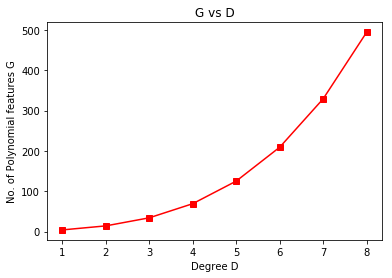

In [393]:
degree_list = [1, 2, 3, 4, 5, 6, 7, 8]
num_poly_feat_list = []
for degree in degree_list:    
    poly_transformer = sklearn.preprocessing.PolynomialFeatures(
        degree=degree, include_bias=False)
    x_tr_MG = poly_transformer.fit_transform(x_tr_MF)
    num_poly_feat_list.append(len(poly_transformer.get_feature_names(['horsepower', 'weight', 'cylinders', 'displacement'])))
    # TODO make the plot
fig_h, G_vs_D = plt.subplots(nrows=1, ncols=1, sharex=True)
G_vs_D.plot(degree_list,num_poly_feat_list, 'rs-')
G_vs_D.set_xlabel('Degree D')
G_vs_D.set_ylabel('No. of Polynomial features G')
G_vs_D.set_title('G vs D')
print(num_poly_feat_list)


#### We can observe that there is an exponential increase in number of features per degree

### 1a(ii): Fit a linear regression model to a polynomial feature transformation of the provided training set of $x$, $y$ values at each of these possible degrees: [1, 2, 3, 4, 5, 6].


[17.95482444211353, 13.947809429967469, 11.45287692204812, 9.15640145419684, 8.014142391262117, 9.450535858162935]
[19.012671119712376, 15.793274734556503, 17.282860593095116, 32.15723680645569, 116.7665128968327, 238.20396843276325]


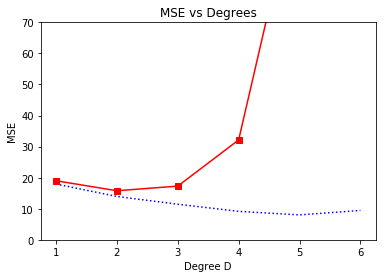

In [394]:
degree_list = [1, 2, 3, 4, 5, 6]
err_tr_list = []
err_va_list = []
coef_list = []
for degree in degree_list:
    poly_transformer = sklearn.preprocessing.PolynomialFeatures(
        degree=degree, include_bias=False)
    x_tr_MG = poly_transformer.fit_transform(x_tr_MF)
    x_va_MG = poly_transformer.fit_transform(x_va_NF)
    linear_regressor = sklearn.linear_model.LinearRegression()
    linear_regressor.fit(x_tr_MG, y_tr_M)
    coef_list.append(linear_regressor.coef_)
    y_tr_predict = linear_regressor.predict(x_tr_MG)
    y_va_predict = linear_regressor.predict(x_va_MG)
    mse_tr = sklearn.metrics.mean_squared_error(y_tr_M, y_tr_predict)
    mse_va = sklearn.metrics.mean_squared_error(y_va_N, y_va_predict)
    err_tr_list.append(mse_tr)
    err_va_list.append(mse_va)
fig_h, lin_reg = plt.subplots(nrows=1, ncols=1, sharex=True)
lin_reg.plot(degree_list,err_tr_list, 'b:', label = "training")
lin_reg.plot(degree_list,err_va_list, 'rs-', label = "validation")
lin_reg.set_ylim([0,70])
lin_reg.set_xlabel('Degree D')
lin_reg.set_ylabel('MSE')
lin_reg.set_title('MSE vs Degrees')
print(err_tr_list)
print(err_va_list)

### **1a(iii):** Based on this plot, which single degree value do you recommend? Why?

Based on this plot, I would recommend degree 2. This is because min MSE for the validation is reached at this degree. 

### **1a(iv):** Report the numerical values of the 5th percentile and 95th percentile of the coefficients observed in your linear regression model for degrees 3, 4, 5, and 6. What seems to be happening?

In [398]:
# TODO answer here
Percentile_5_deg_3 = np.percentile(coef_list[2], 5)
Percentile_95_deg_3 = np.percentile(coef_list[2], 95)
Percentile_5_deg_4 = np.percentile(coef_list[3], 5)
Percentile_95_deg_4 = np.percentile(coef_list[3], 95)
Percentile_5_deg_5 = np.percentile(coef_list[4], 5)
Percentile_95_deg_5 = np.percentile(coef_list[4], 95)
Percentile_5_deg_6 = np.percentile(coef_list[5], 5)
Percentile_95_deg_6 = np.percentile(coef_list[5], 95)
#fig_i, deg3_6 = plt.subplots(nrows=1, ncols=1, sharex=True)
#deg3_6.plot(degrees, perc5, "rs-")
#deg3_6.plot(degrees, perc95, "b:")
perc5 = [Percentile_5_deg_3,Percentile_5_deg_4,Percentile_5_deg_5,Percentile_5_deg_6]
perc95 = [Percentile_95_deg_3,Percentile_95_deg_4,Percentile_95_deg_5,Percentile_95_deg_6]
degrees = [3,4,5,6]
print(Percentile_5_deg_3, Percentile_95_deg_3)
print(Percentile_5_deg_4, Percentile_95_deg_4)
print(Percentile_5_deg_5, Percentile_95_deg_5)
print(Percentile_5_deg_6, Percentile_95_deg_6)

-1.4910547092374542 0.9158547894169123
-0.7601976709757741 0.1747196734633189
-0.0002935403326484481 0.00012483815338029157
-3.032222831859052e-08 3.273819798832591e-08


#### We notice that there is convergence of the 5th and 95th percentile weights as the degree increases. 

### **1a(v):** Comment on the training error observed at degree 6. Based on your formulas from **1a(i)** and your knowledge of linear regression, what **should** the training error be at degree 6? What do you think is happening instead?

Based on the graph of features against degree, the training error observed should be 0 at 6 as the 
number of features > number of data points for fitting. 

However, this is not the case due to differences in absolute value of the different features. As the initial 4 features have varying scales (thousands vs units), the resulting weights for transformed features that take into account the large scales (i.e: Weight^6), will have a very low value. The model effectively does not take into consideration these coeffiecients as almost any value produced will obtain the same regression. Hence, it is not required to produce accurate results for many of the transformed features, thus MSE goes up.

# 1b: Linear regression with Rescaled Polynomial Bases

Setup code below to make a pipeline

In [399]:
def make_pipeline(degree=None):
    pipeline = sklearn.pipeline.Pipeline(
        steps=[
         ('rescaler', sklearn.preprocessing.MinMaxScaler()),
         ('poly_transformer', sklearn.preprocessing.PolynomialFeatures(degree=degree, include_bias=False)),
         ('poly_rescaler', sklearn.preprocessing.MinMaxScaler()),
         ('linear_regr', sklearn.linear_model.LinearRegression()),
        ])
    
    # Define utility method that performs all the feature transforms of the pipeline in order.
    def calc_features(x):
        ''' Maps input features to rescaled polynomial features
        '''
        feat = x
        for step_name, step_tfmr in pipeline.steps[:-1]:
            feat = step_tfmr.transform(feat)
        return feat
    pipeline.calc_features = calc_features
    
    # Define utility method that accesses the linear regression weights
    pipeline.get_linear_regr_weights = lambda: pipeline.named_steps['linear_regr'].coef_

    # Return the constructed pipeline
    # We can treat it as if it has a 'regression' API
    # e.g. a fit and a predict method
    return pipeline

In [400]:
degree_list = [1, 2, 3, 4, 5, 6]
err_tr_list = []
err_va_list = []
pipeline_list = []
for degree in degree_list:
    pipe = make_pipeline(degree = degree)
    #x_tr_MG = pipe.calc_features(x_tr_MF)
    pipe.fit(x_tr_MF, y_tr_M)
    pipeline_list.append(pipe.get_linear_regr_weights())
    y_tr_predict = pipe.predict(x_tr_MF)
    y_va_predict = pipe.predict(x_va_NF)
    mse_tr = sklearn.metrics.mean_squared_error(y_tr_M, y_tr_predict)
    mse_va = sklearn.metrics.mean_squared_error(y_va_N, y_va_predict)
    err_tr_list.append(mse_tr)
    err_va_list.append(mse_va)

# TODO fit model at each degree and track error metrics

#### 1b(i): Plot MSE for *rescaled* polynomial features vs. degrees

[17.95482444211353, 13.947809429967464, 11.452876921225444, 8.412902227197891, 5.24702381082665, 0.2984369593038227]
[19.01267111971239, 15.79327473451175, 17.282843312058688, 67.82032382107752, 2.7099452688593367e+18, 1.8111435906191187e+17]


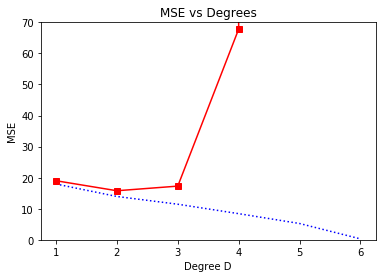

In [401]:
# TODO make plot here
fig_k, lin_reg_t = plt.subplots(nrows=1, ncols=1, sharex=True)
lin_reg_t.plot(degree_list,err_tr_list, 'b:')
lin_reg_t.plot(degree_list,err_va_list, 'rs-')
lin_reg_t.set_ylim([0,70])
lin_reg_t.set_xlabel('Degree D')
lin_reg_t.set_ylabel('MSE')
lin_reg_t.set_title('MSE vs Degrees')
print(err_tr_list)
print(err_va_list)

### **1b(ii):** Using this new analysis, which degree do you recommend? 


Based on the new analysis, I would recommend degree 2 as it has the lowest MSE

### **1b(iii):** Report the numerical values of the 5th percentile and 95th percentile of the coefficients observed in this most recent linear regression model at all degrees. What seems to be happening? What's different than in **1a**?

In [402]:
# TODO Code here
Percentile_5_deg_3 = np.percentile(pipeline_list[2], 5)
Percentile_95_deg_3 = np.percentile(pipeline_list[2], 95)
Percentile_5_deg_4 = np.percentile(pipeline_list[3], 5)
Percentile_95_deg_4 = np.percentile(pipeline_list[3], 95)
Percentile_5_deg_5 = np.percentile(pipeline_list[4], 5)
Percentile_95_deg_5 = np.percentile(pipeline_list[4], 95)
Percentile_5_deg_6 = np.percentile(pipeline_list[5], 5)
Percentile_95_deg_6 = np.percentile(pipeline_list[5], 95)
perc5 = [Percentile_5_deg_3,Percentile_5_deg_4,Percentile_5_deg_5,Percentile_5_deg_6]
perc95 = [Percentile_95_deg_3,Percentile_95_deg_4,Percentile_95_deg_5,Percentile_95_deg_6]
degrees = [3,4,5,6]
#fig_i, deg3_6 = plt.subplots(nrows=1, ncols=1, sharex=True)
#deg3_6.plot(degrees, perc5, "rs-")
#deg3_6.plot(degrees, perc95, "b:")
print(Percentile_5_deg_3, Percentile_95_deg_3)
print(Percentile_5_deg_4, Percentile_95_deg_4)
print(Percentile_5_deg_5, Percentile_95_deg_5)
print(Percentile_5_deg_6, Percentile_95_deg_6)

-980.03237835655 824.9365641647801
-22831.61184849354 19507.941111388507
-1579559357841.57 2433372663680.2505
-361352021406.53705 438476341139.1675


**Answer**: There seems to be a divergence of weights as the degree increases which is opposite from what is happening in 1a. In this case, as we have rescaled the initial 4 features as well as the transformed features, the weights assigned to each transformed feature will be relatively more even and thus is expected to increase accordingly as the number of features increases.

# 1c: Cross Validation setup

Combine original train/valid splits into one mega dataset

In [403]:
x_trva_LF = np.vstack([x_tr_MF, x_va_NF])
y_trva_L = np.hstack([y_tr_M, y_va_N])

### **Coding Step 1/1:** Complete the starter code function 

In [404]:
def calc_mean_squared_error_across_k_folds(
        model, x_LF, y_L, K=5, random_state=0):
    ''' Calculate mean squared error on K cross-validation folds
    
    Args
    ----
    model: sklearn predictor object
        has `fit` and `predict` methods
    x_LF : 2D array, size n_examples x n_features
        
    y_L : 1D array, size n_examples
    K : int
    random_state : int or np.random.RandomState instance
    
    Returns
    -------
    mse_scores_K : 1D array, size K
        1
    '''
    kfold_iterator = sklearn.model_selection.KFold(
        n_splits=K, shuffle=True, random_state=random_state)
    err_va_list = []
    for train, test in kfold_iterator.split(x_LF, y_L):
        model.fit(x_LF[train], y_L[train])
        y_va_predict = model.predict(x_LF[test])
        mse_va = sklearn.metrics.mean_squared_error(y_L[test], y_va_predict)
        err_va_list.append(mse_va)
    return err_va_list
    # TODO compute mse on each of the K folds

### **1c(i):** Using your `calc_mean_squared_error_across_k_folds` function with 10 folds, make a line plot of the *average* mean-squared-error at degrees 1, 2, 3, 4, 5, 6. 

[18.807418277612207, 15.977842097206914, 23.804535407116123, 3.3938216685974303e+18, 3.0369417235173494e+20, 3.2080233514322105e+21]


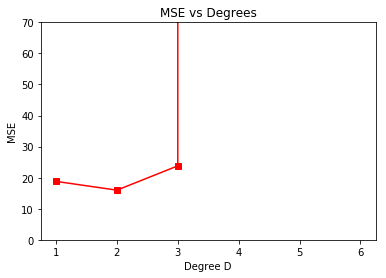

In [405]:
# TODO 
degree_list = [1, 2, 3, 4, 5, 6]
mse = []

for degree in degree_list:
    fold_pipe= make_pipeline(degree = degree)
    mse.append(np.average(calc_mean_squared_error_across_k_folds(fold_pipe, x_trva_LF, y_trva_L, K = 10)))
fig_k, lin_reg_f = plt.subplots(nrows=1, ncols=1, sharex=True)
lin_reg_f.plot(degree_list,mse, 'rs-')
lin_reg_f.set_ylim([0,70])
lin_reg_f.set_xlabel('Degree D')
lin_reg_f.set_ylabel('MSE')
lin_reg_f.set_title('MSE vs Degrees')
print(mse)

#### **1c(ii):** Based on this plot, what is your recommended degree? How do your recommendations differ from *1b*?

**Answer**: Based on the plot, I would still recommend degree 2 which is similar to 1b. We can notice, however, that frmo degree 3 onwards, the MSE increases dramatically such that MSE for 1c is higher than 1b for degrees >= 3

#### **1c(iii):** For each $K$, make a scatter plot of the $K$ fold-specific estimates of MSE ($K$ is x-axis, MSE on y-axis). Also draw a line connecting the average MSE across $K$.

Text(0.5,1,'MSE vs No. of Folds')

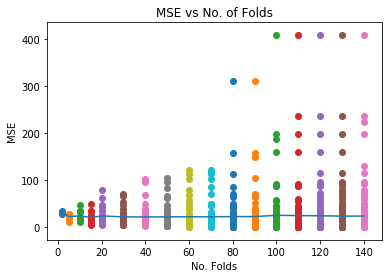

In [406]:
degree = 3
K_list = [2, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
pipeline = make_pipeline(degree)
err_cv_list = []
avg_score_list = []
for k in K_list:
    err_cv_list.append(calc_mean_squared_error_across_k_folds(pipeline, x_trva_LF, y_trva_L, K = k))
for i in range(len(err_cv_list)):
    avg_score_list.append(np.average(err_cv_list[i]))
#fig_h, scatter = plt.subplots(nrows=1, ncols=1, sharex=True)
for x,y in (zip(K_list, err_cv_list)):
    #print(y)
    plt.scatter([x]*len(y), y)
plt.plot(K_list, avg_score_list)
plt.xlabel('No. Folds')
plt.ylabel('MSE')
plt.title('MSE vs No. of Folds')
#print(len(K_list))
#print(err_cv_list)


# TODO

### 1civ)

The distribution of MSE increases as the number of folds used increases. This is in accordance with th ereadings as the more folds that are used, the higher the variance tends to be.

# Problem 2: Regularized Linear Regression via L2 and L1 penalties

### Setup Pipeline for Problem 2a: Grid Search for L2

In [407]:
alpha_grid = np.logspace(-9, 6, 31)

In [408]:
def make_L2regularized_pipeline(degree=2, alpha=1.0):
    pipeline = sklearn.pipeline.Pipeline(
        steps=[
         ('rescaler', sklearn.preprocessing.MinMaxScaler()),
         ('poly_transformer', sklearn.preprocessing.PolynomialFeatures(degree=degree, include_bias=False)),
         ('poly_rescaler', sklearn.preprocessing.MinMaxScaler()),
         ('linear_regr', sklearn.linear_model.Ridge(alpha=alpha)),
        ])
    
    # Define utility method that performs all the feature transforms of the pipeline in order.
    def calc_features(x):
        tmp = x
        for step_name, step_tfmr in pipeline.steps[:-1]:
            tmp = step_tfmr.transform(tmp)
        return tmp
    pipeline.calc_features = calc_features
    
    pipeline.get_linear_regr_weights = lambda: pipeline.named_steps['linear_regr'].coef_
    pipeline.get_linear_regr_bias = lambda: pipeline.named_steps['linear_regr'].intercept_

    return pipeline

## Problem 2a: Grid Search for L2

### **2a(i):** Train `Ridge` regression across grid of possible L2-penalty strengths $\alpha$. Using *degree 2* polynomial features, plot the MSE vs. regularization strength on train and validation.

Text(0.5,1,'MSE vs Alpha')

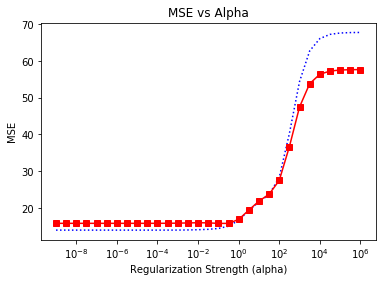

In [411]:
# TODO plotting code here
mse_tr_a = []
mse_va_a = []
#pipeline_list = []
for a in alpha_grid:
    pen_pipe = make_L2regularized_pipeline(degree=2, alpha=a)
    pen_pipe.fit(x_tr_MF, y_tr_M)
    y_tr_predict = pen_pipe.predict(x_tr_MF)
    y_va_predict = pen_pipe.predict(x_va_NF)
    mse_tr = sklearn.metrics.mean_squared_error(y_tr_M, y_tr_predict)
    mse_va = sklearn.metrics.mean_squared_error(y_va_N, y_va_predict)
    mse_tr_a.append(mse_tr)
    mse_va_a.append(mse_va)
fig_k, lin_reg_a = plt.subplots(nrows=1, ncols=1, sharex=True)
lin_reg_a.plot(alpha_grid,mse_tr_a, 'b:')
lin_reg_a.plot(alpha_grid,mse_va_a, 'rs-')
lin_reg_a.set_xscale("log")
lin_reg_a.set_xlabel("Regularization Strength (alpha)")
lin_reg_a.set_ylabel("MSE")
lin_reg_a.set_title("MSE vs Alpha")

### **2a(ii):** Make the same plot at degree 6

Text(0.5,1,'MSE vs Alpha')

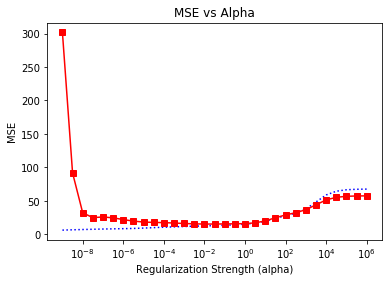

In [413]:
# TODO plotting code here
mse_tr_a = []
mse_va_a = []
pipeline_list = []
for a in alpha_grid:
    pen_pipe = make_L2regularized_pipeline(degree=6, alpha=a)
    pen_pipe.fit(x_tr_MF, y_tr_M)
    pipeline_list.append(pen_pipe.get_linear_regr_weights())
    y_tr_predict = pen_pipe.predict(x_tr_MF)
    y_va_predict = pen_pipe.predict(x_va_NF)
    mse_tr = sklearn.metrics.mean_squared_error(y_tr_M, y_tr_predict)
    mse_va = sklearn.metrics.mean_squared_error(y_va_N, y_va_predict)
    mse_tr_a.append(mse_tr)
    mse_va_a.append(mse_va)
fig_k, lin_reg_a = plt.subplots(nrows=1, ncols=1, sharex=True)
lin_reg_a.plot(alpha_grid,mse_tr_a, 'b:')
lin_reg_a.plot(alpha_grid,mse_va_a, 'rs-')
lin_reg_a.set_xscale("log")
lin_reg_a.set_xlabel("Regularization Strength (alpha)")
lin_reg_a.set_ylabel("MSE")
lin_reg_a.set_title("MSE vs Alpha")
#lin_reg_a.set_ylim([0,20])

### 2a(iii): How does the recommended $\alpha$ change from deg. 2 to 6?

**Answer**: For degree 2, the recommended alpha value is 10<sup>-1</sup> where as for degree 6, the recommended alpha reduces to 10<sup>-2</sup>. Alpha values were chosen based on values that minimize MSE. It should be noted that in degree 6, the lowest alpha values tended to increase MSE whereas this is not the case for degree 2

### 2a(iv)

Text(0.5,1,'Number of non-zero Coefficients vs Alpha')

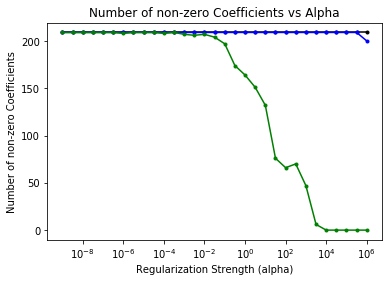

In [414]:
a_list1 = []
a_list2 = []
a_list3 = []

for i in pipeline_list: 
    #print(i)
    a_list1.append(len(np.where(i != 0)[0]))
    a_list2.append(len(np.where(np.abs(i) > 0.0001)[0]))
    a_list3.append(len(np.where(np.abs(i) > 0.1)[0]))
fig_k, lin_reg_b = plt.subplots(nrows=1, ncols=1, sharex=True)
lin_reg_b.plot(alpha_grid, a_list1, 'k.-')
lin_reg_b.plot(alpha_grid, a_list2, 'b.-')
lin_reg_b.plot(alpha_grid, a_list3, 'g.-')
lin_reg_b.set_xscale("log")
lin_reg_b.set_xlabel("Regularization Strength (alpha)")
lin_reg_b.set_ylabel("Number of non-zero Coefficients")
lin_reg_b.set_title("Number of non-zero Coefficients vs Alpha")

## Problem 2b: Grid search for L1

In [415]:
def make_L1regularized_pipeline(degree=2, alpha=1.0):
    pipeline = sklearn.pipeline.Pipeline(
        steps=[
         ('rescaler', sklearn.preprocessing.MinMaxScaler()),
         ('poly_transformer', sklearn.preprocessing.PolynomialFeatures(degree=degree, include_bias=False)),
         ('poly_rescaler', sklearn.preprocessing.MinMaxScaler()),
         ('linear_regr', sklearn.linear_model.Lasso(alpha=alpha, max_iter=50000)),
        ])
    
    # Define utility method that performs all the feature transforms of the pipeline in order.
    def calc_features(x):
        tmp = x
        for step_name, step_tfmr in pipeline.steps[:-1]:
            tmp = step_tfmr.transform(tmp)
        return tmp
    pipeline.calc_features = calc_features
    
    pipeline.get_linear_regr_weights = lambda: pipeline.named_steps['linear_regr'].coef_
    pipeline.get_linear_regr_bias = lambda: pipeline.named_steps['linear_regr'].intercept_

    return pipeline

In [416]:
alpha_grid = np.logspace(-9, 6, 31)
degree = 3
err_tr_list = []
err_va_list = []
pipeline_list = []
for alpha in alpha_grid: # TODO loop over all alpha_grid
    
    # Create pipeline with specified alpha
    pipeline = make_L1regularized_pipeline(alpha=alpha, degree=degree)
    
    # L1 solvers are a bit more finicky than L2 solvers
    # Here's some code that will show if each optimization has converged
    with warnings.catch_warnings(record=True) as warn_list:
        pipeline.fit(x_tr_MF, y_tr_M)
        solver = pipeline.named_steps['linear_regr']
        print("alpha % .3e | %s | completed %5d iters | gap % 10.3f" % (
            alpha, 
            'converged    ' if len(warn_list) == 0 else 'NOT converged',
            solver.n_iter_, solver.dual_gap_))

    # TODO evaluation code here

    pipeline.fit(x_tr_MF, y_tr_M)
    pipeline_list.append(pipeline.get_linear_regr_weights())
    y_tr_predict = pipeline.predict(x_tr_MF)
    y_va_predict = pipeline.predict(x_va_NF)
    mse_tr = sklearn.metrics.mean_squared_error(y_tr_M, y_tr_predict)
    mse_va = sklearn.metrics.mean_squared_error(y_va_N, y_va_predict)
    err_tr_list.append(mse_tr)
    err_va_list.append(mse_va)
#lin_reg_a.set_ylim([0,20])
    

alpha  1.000e-09 | NOT converged | completed 50000 iters | gap   1158.062


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha  3.162e-09 | NOT converged | completed 50000 iters | gap   1158.054


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha  1.000e-08 | NOT converged | completed 50000 iters | gap   1158.028


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha  3.162e-08 | NOT converged | completed 50000 iters | gap   1157.948


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha  1.000e-07 | NOT converged | completed 50000 iters | gap   1157.693


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha  3.162e-07 | NOT converged | completed 50000 iters | gap   1156.888


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha  1.000e-06 | NOT converged | completed 50000 iters | gap   1154.329


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha  3.162e-06 | NOT converged | completed 50000 iters | gap   1146.134


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha  1.000e-05 | NOT converged | completed 50000 iters | gap   1119.175


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha  3.162e-05 | NOT converged | completed 50000 iters | gap   1023.272


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha  1.000e-04 | NOT converged | completed 50000 iters | gap    548.999


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha  3.162e-04 | NOT converged | completed 50000 iters | gap     17.487


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha  1.000e-03 | converged     | completed 33186 iters | gap      1.285
alpha  3.162e-03 | converged     | completed  3340 iters | gap      1.301
alpha  1.000e-02 | converged     | completed   988 iters | gap      1.299
alpha  3.162e-02 | converged     | completed   519 iters | gap      0.717
alpha  1.000e-01 | converged     | completed    42 iters | gap      0.179
alpha  3.162e-01 | converged     | completed    92 iters | gap      0.075
alpha  1.000e+00 | converged     | completed    14 iters | gap      0.000
alpha  3.162e+00 | converged     | completed     1 iters | gap      0.000
alpha  1.000e+01 | converged     | completed     1 iters | gap      0.000
alpha  3.162e+01 | converged     | completed     1 iters | gap      0.000
alpha  1.000e+02 | converged     | completed     1 iters | gap      0.000
alpha  3.162e+02 | converged     | completed     1 iters | gap      0.000
alpha  1.000e+03 | converged     | completed     1 iters | gap      0.000
alpha  3.162e+03 | converged     | com

### 2b(i): Plot MSE vs. $\alpha$ for L1 ("Lasso")

Text(0.5,1,'MSE vs Regularization Strength (alpha)')

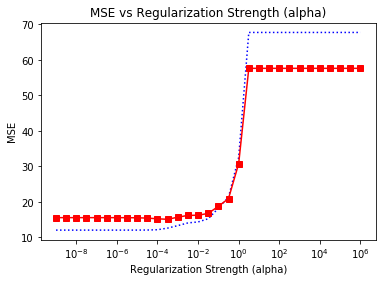

In [417]:
# TODO make plot
fig_k, lin_reg_b = plt.subplots(nrows=1, ncols=1, sharex=True)
lin_reg_b.plot(alpha_grid,err_tr_list, 'b:')
lin_reg_b.plot(alpha_grid,err_va_list, 'rs-')
lin_reg_b.set_xscale("log")
lin_reg_b.set_xlabel("Regularization Strength (alpha)")
lin_reg_b.set_ylabel("MSE")
lin_reg_b.set_title("MSE vs Regularization Strength (alpha)")


### 2b(ii): Plot number of non-zero coefficients

Text(0.5,1,'Number of non-zero Coefficients vs Alpha')

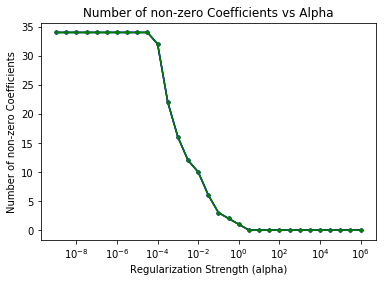

In [421]:
# TODO make plot
fig_k, lin_reg_b = plt.subplots(nrows=1, ncols=1, sharex=True)
#print(pipeline_list[pipeline_list != 0])

list1 = []
list2 = []
list3 = []
for i in pipeline_list: 
    list1.append(len(np.where(i != 0)[0]))
#     print(len(np.where(i!=0)[0]))
    list2.append(len(np.where(np.abs(i) > 0.0001)[0]))
    list3.append(len(np.where(np.abs(i) > 0.1)[0]))
lin_reg_b.plot(alpha_grid, list1, 'k.-', label = "Equal 0")
lin_reg_b.plot(alpha_grid, list2, 'b.-', label = "> 0.0001")
lin_reg_b.plot(alpha_grid, list3, 'g.-', label = "> 0.1")
lin_reg_b.set_xscale("log")
lin_reg_b.set_xlabel("Regularization Strength (alpha)")
lin_reg_b.set_ylabel("Number of non-zero Coefficients")
lin_reg_b.set_title("Number of non-zero Coefficients vs Alpha")

### 2b(iii): Print out non-zero coefficients of learned L1-regularized models

In [419]:
# TODO write code
poly_transformer = sklearn.preprocessing.PolynomialFeatures(degree=6, include_bias=False)
x_tr_MG = poly_transformer.fit_transform(x_tr_MF)
feature_names = poly_transformer.get_feature_names(['horsepower', 'weight', 'cylinders', 'displacement'])
names_14 = []
names_15 = []
names_16 = []
names_17 = []
names_18 = []
for i in np.where(pipeline_list[14] != 0)[0]:
    names_14.append(feature_names[i])
for i in np.where(pipeline_list[15] != 0)[0]:
    names_15.append(feature_names[i])
for i in np.where(pipeline_list[16] != 0)[0]:
    names_16.append(feature_names[i])
for i in np.where(pipeline_list[17] != 0)[0]:
    names_17.append(feature_names[i])
for i in np.where(pipeline_list[18] != 0)[0]:
    names_18.append(feature_names[i])
print(names_14, pipeline_list[14][np.where(pipeline_list[14] != 0)])
print(names_15, pipeline_list[15][np.where(pipeline_list[15] != 0)])
print(names_16, pipeline_list[16][np.where(pipeline_list[16] != 0)])
print(names_17, pipeline_list[17][np.where(pipeline_list[17] != 0)])
print(names_18, pipeline_list[18][np.where(pipeline_list[18] != 0)])

['horsepower', 'weight', 'displacement', 'horsepower^2 weight', 'horsepower^2 cylinders', 'horsepower^2 displacement', 'horsepower weight cylinders', 'horsepower weight displacement', 'cylinders^3', 'cylinders displacement^2'] [-26.61008965 -15.75278694  -9.31042275   4.43294153   1.11610935
   6.56742617   0.82653719   6.76819246   2.74367969   1.75086204]
['horsepower', 'weight', 'displacement', 'horsepower^2 weight', 'horsepower weight cylinders', 'horsepower weight displacement'] [-18.18546784 -19.19712937  -3.42584887   1.97303641   2.55788168
   8.52911256]
['horsepower', 'weight', 'cylinders'] [ -7.31298808 -16.60197849  -2.64186726]
['weight', 'cylinders^2'] [-13.36529661  -5.94469216]
['cylinders^2'] [-9.5498668]


## Problem 3

### 3a: Adding fake observations to a no-bias linear regression


**Question:** 
You are given a training dataset for regression $\{x_n, y_n \}_{n=1}^N$. Each feature vector $x_n$ has size $F=4$. Each $y_n$ is a scalar.

You decide to add in the following additional "fake" observations $\tilde{x}$:

\begin{align}
\begin{array}{c c c c}
    ~\sqrt{\lambda}  & 0  & 0 & 0
 \\ 0  & \sqrt{\lambda}  & 0  & 0
 \\ 0  &0 & \sqrt{\lambda} &0
 \\ 0  & 0  & 0  &\sqrt{\lambda}
\end{array}
\end{align}

You also add in 4 "fake" responses $\tilde{y}$, all equal to zero.

You then wish to fit a least squares linear regression model with no bias/intercept term to the combined labeled dataset that is the union of $x$ and $\tilde{x}$, $y$ and $\tilde{y}$.

Write down the optimization objective and simplify as much as possible. Is this "add fake data" process interpretable as some kind of regularization?



**Solution**:

TODO write using Markdown / LaTeX syntax.

Or paste in an image of a handwritten solution.

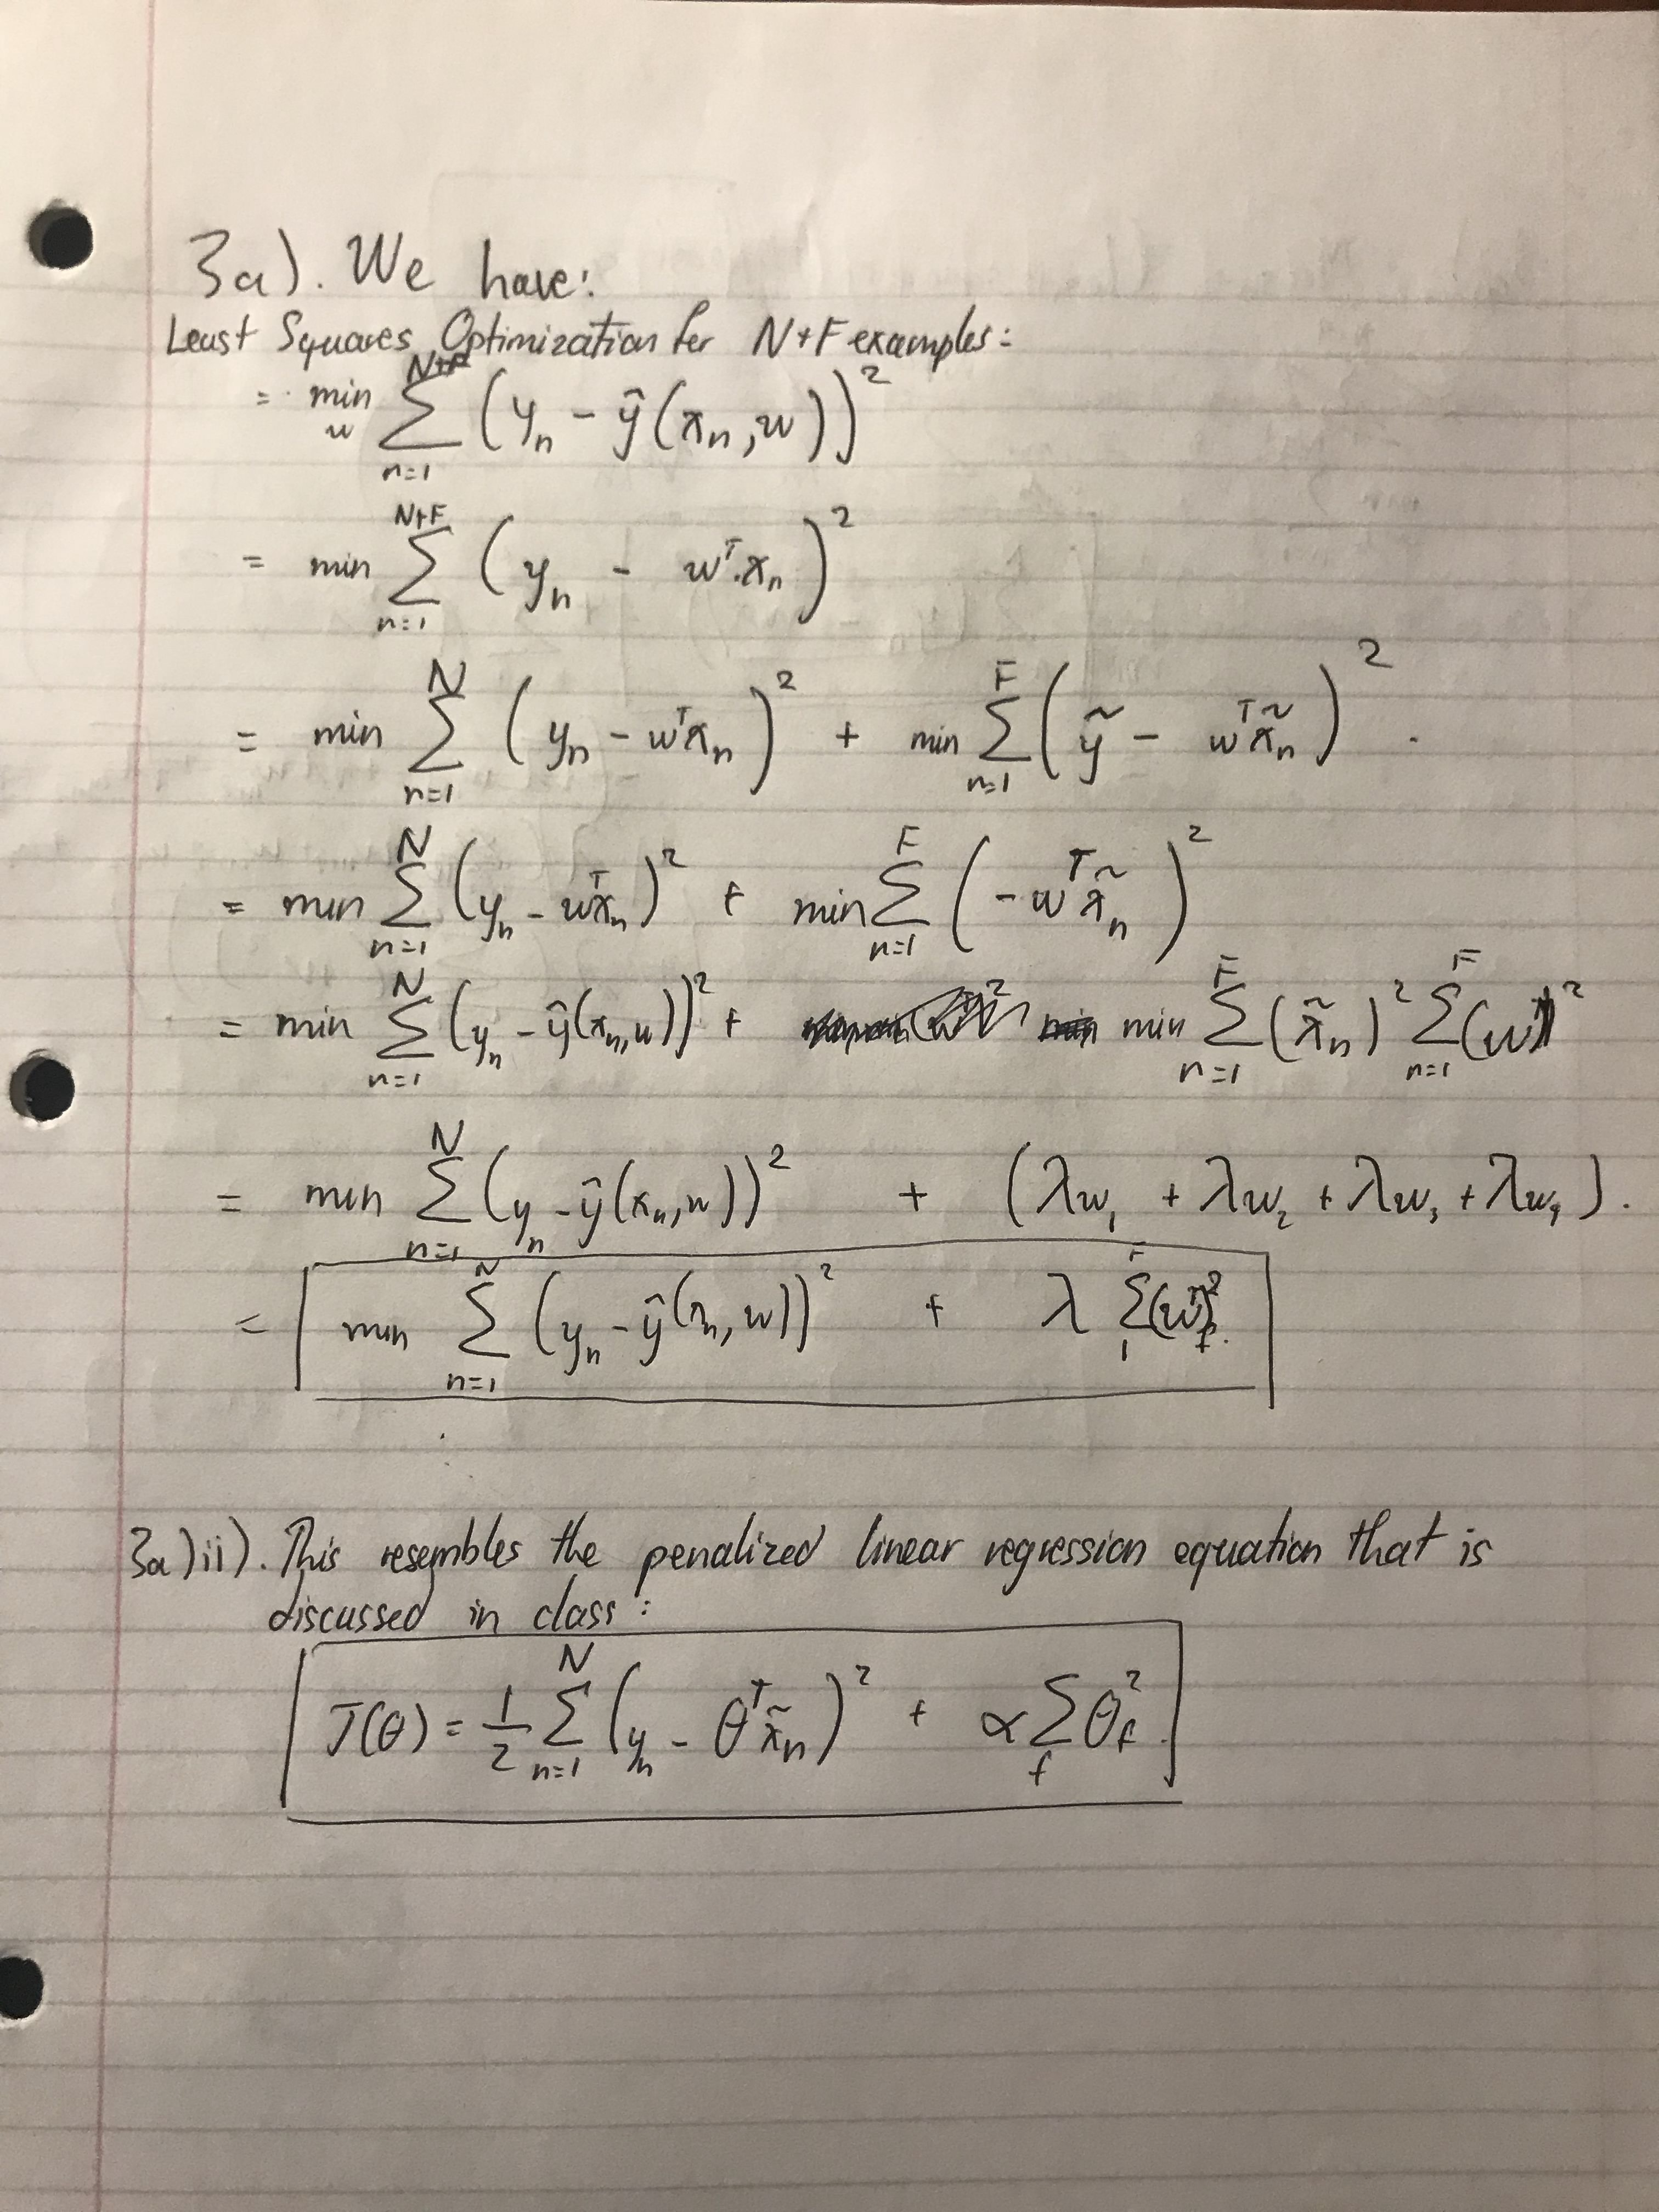